In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('Data2.csv', on_bad_lines='skip', encoding='cp1252', delimiter=';')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610


In [3]:
df.columns = ['country_name', 'region', 'gdp_per_capita', 'population', 'co2_emission', 'area']
df.set_index('country_name', inplace=True)
df.gdp_per_capita = df.gdp_per_capita.astype(str).str.replace(',', '.').astype(float)
df.co2_emission = df.co2_emission.astype(str).str.replace(',', '.').astype(float)
df.area = df.area.astype(str).str.replace(',', '.').astype(float)
df.gdp_per_capita = df.gdp_per_capita.abs()
df.area = df.area.abs()
df.gdp_per_capita.fillna(df.gdp_per_capita.mean(), inplace=True)
df.population.fillna(df.population.mean(), inplace=True)
df.co2_emission.fillna(df.co2_emission.mean(), inplace=True)
df.population = df.population.astype(int)
df

,region,gdp_per_capita,population,co2_emission,area
country_name,,,,,
Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0
Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0
Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0
American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0
Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0
...,...,...,...,...,...
Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951,165114.116337,350.0
West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,165114.116337,6020.0
"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0


In [4]:
def test_normality(column: pd.Series, alpha=0.05):
    _, p = stats.normaltest(column)
    return alpha < p

In [5]:
df[['gdp_per_capita', 'population', 'co2_emission', 'area']].apply(test_normality)

gdp_per_capita    False
population        False
co2_emission      False
area              False
dtype: bool

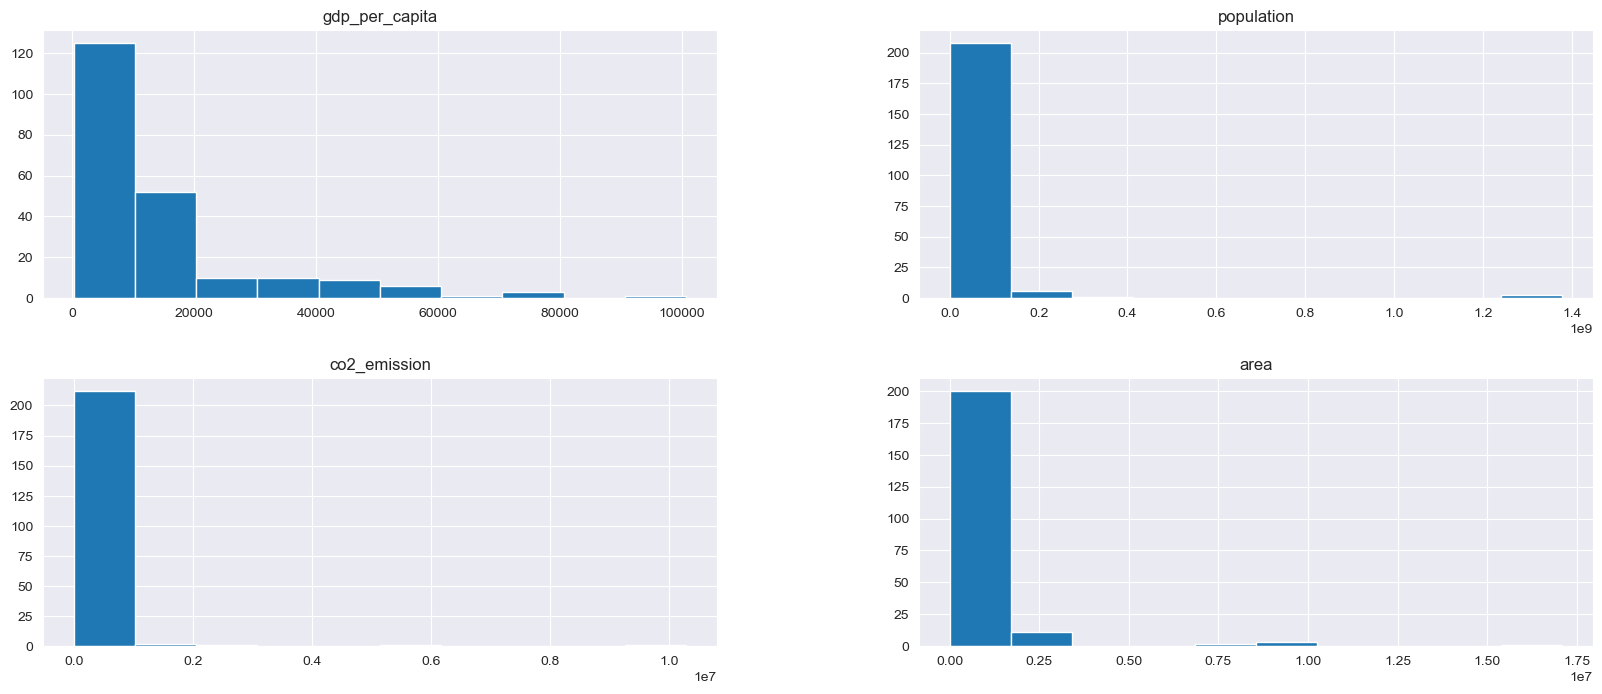

In [6]:
df[['gdp_per_capita', 'population', 'co2_emission', 'area']].hist(figsize=(20, 8));

In [7]:
def ttest(column: pd.Series, alpha=0.05):
    stat, pvalue = stats.ttest_1samp(column, column.median())
    return alpha < pvalue

In [8]:
df[['gdp_per_capita', 'population', 'co2_emission', 'area']].apply(ttest)

gdp_per_capita    False
population        False
co2_emission      False
area              False
dtype: bool

In [9]:
def normality_difference(group: pd.Series):
    anderson_result = stats.anderson(group)
    differences = anderson_result.statistic - anderson_result.critical_values[2]
    differences = np.abs(differences)
    return differences.min()

In [10]:
region_group = df.groupby('region').co2_emission.aggregate(normality_difference)
region_group[[region_group.idxmin()]]

region
South Asia    1.375605
Name: co2_emission, dtype: float64

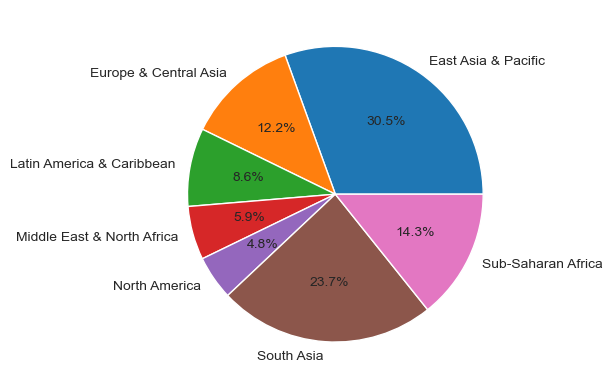

In [11]:
df.groupby('region').population.sum().plot.pie(ylabel='', autopct='%1.1f%%');